In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("test.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Missing Values

* Handling Categorical features with missing values

In [5]:
features_nan = [feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes=='O']

for feature in features_nan:
    print(feature,':',np.round(data[feature].isnull().mean()*100,4)," % missing values")

MSZoning : 0.2742  % missing values
Alley : 92.6662  % missing values
Utilities : 0.1371  % missing values
Exterior1st : 0.0685  % missing values
Exterior2nd : 0.0685  % missing values
MasVnrType : 1.0966  % missing values
BsmtQual : 3.0158  % missing values
BsmtCond : 3.0843  % missing values
BsmtExposure : 3.0158  % missing values
BsmtFinType1 : 2.8787  % missing values
BsmtFinType2 : 2.8787  % missing values
KitchenQual : 0.0685  % missing values
Functional : 0.1371  % missing values
FireplaceQu : 50.0343  % missing values
GarageType : 5.209  % missing values
GarageFinish : 5.3461  % missing values
GarageQual : 5.3461  % missing values
GarageCond : 5.3461  % missing values
PoolQC : 99.7944  % missing values
Fence : 80.1234  % missing values
MiscFeature : 96.5045  % missing values
SaleType : 0.0685  % missing values


In [6]:
## Using the idea of Frequent Category Imputation
## But here we just replace the missing values with new label


def cat_feature_replace(data,features_nan):
    dataset = data.copy()
    dataset[features_nan]=dataset[features_nan].fillna("Missing")
    return dataset
data = cat_feature_replace(data,features_nan)
data[features_nan].isnull().sum()
    

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

* Handling Numerical features with missing values

In [7]:
numerical_feature_nan = [feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes !='O']

for feature in numerical_feature_nan:
    print(feature,' : ',np.round(data[feature].isnull().mean()*100,2),"% missing values")

LotFrontage  :  15.56 % missing values
MasVnrArea  :  1.03 % missing values
BsmtFinSF1  :  0.07 % missing values
BsmtFinSF2  :  0.07 % missing values
BsmtUnfSF  :  0.07 % missing values
TotalBsmtSF  :  0.07 % missing values
BsmtFullBath  :  0.14 % missing values
BsmtHalfBath  :  0.14 % missing values
GarageYrBlt  :  5.35 % missing values
GarageCars  :  0.07 % missing values
GarageArea  :  0.07 % missing values


In [8]:
## Replacing the missing values of the numerical features

for feature in numerical_feature_nan:
    
    # capturing NAN value with new feature
    data[feature+'nan'] = np.where(data[feature].isnull(),1,0)
    data[feature].fillna(data[feature].median(),inplace = True)
    
data[numerical_feature_nan].isnull().mean()

LotFrontage     0.0
MasVnrArea      0.0
BsmtFinSF1      0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
GarageYrBlt     0.0
GarageCars      0.0
GarageArea      0.0
dtype: float64

* Handling Temporal Variables

In [9]:
for feature in ['YearBuilt','YearRemodAdd',"GarageYrBlt"]:
    data[feature] = data['YrSold']-data[feature]

* Application of lognormal distribution on the skewed data

In [10]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
year_feature = [ feature for feature in numerical_feature if "Yr" in feature or 'Year' in feature]
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['Id']+year_feature]

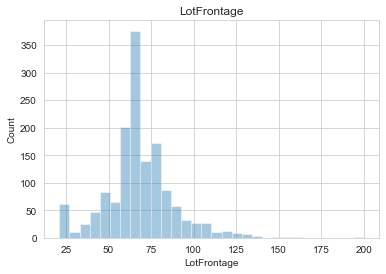

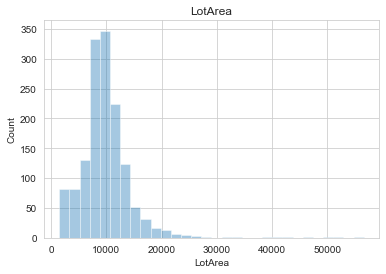

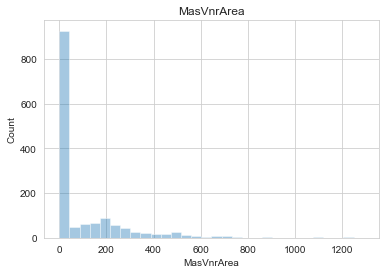

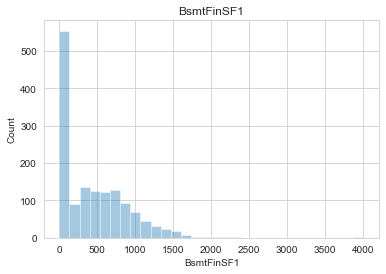

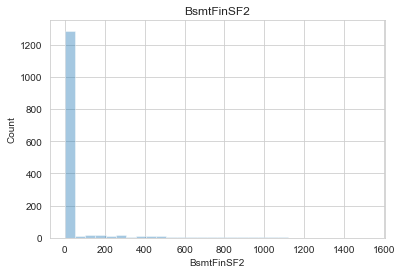

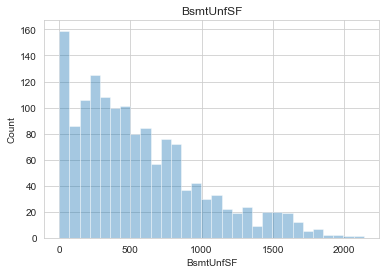

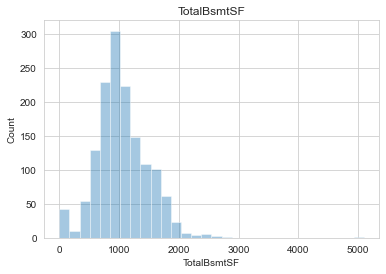

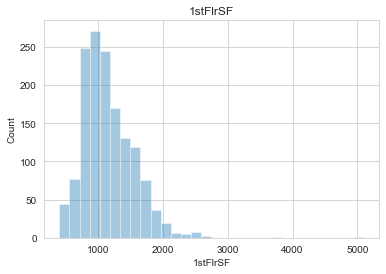

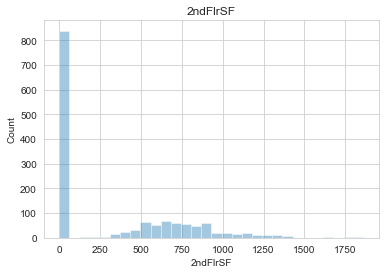

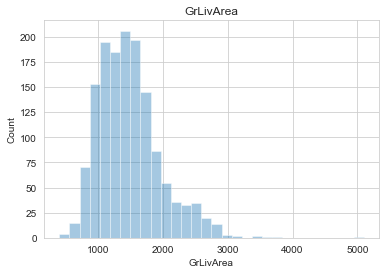

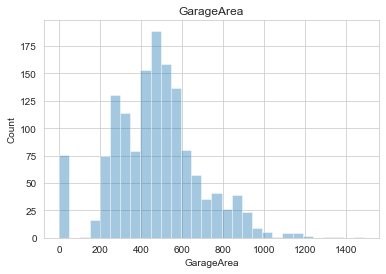

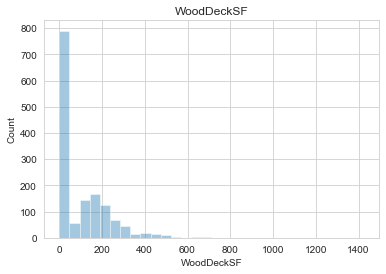

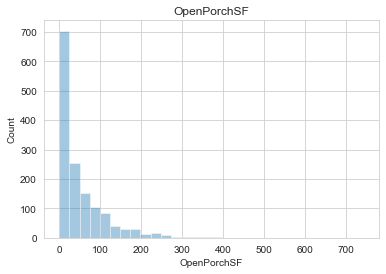

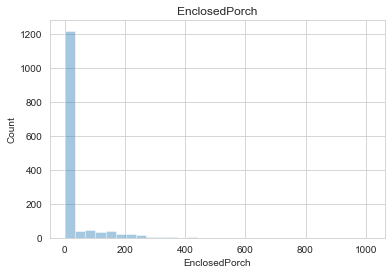

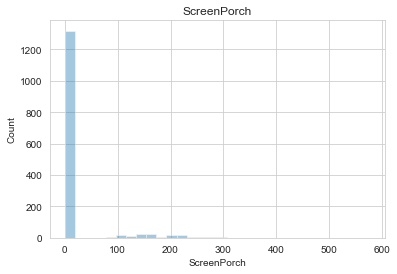

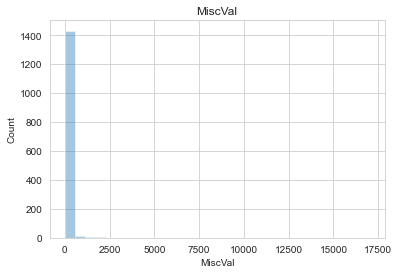

In [11]:
for feature in continuous_feature:
    dataset = data.copy()
    sns.set_style("whitegrid")
    sns.distplot(dataset[feature],bins=30,kde=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

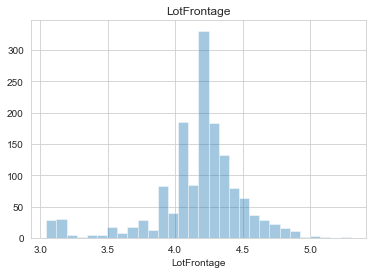

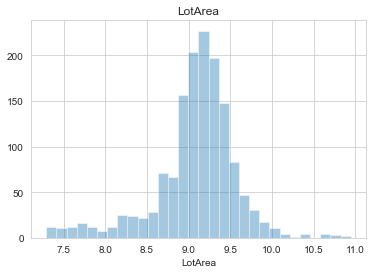

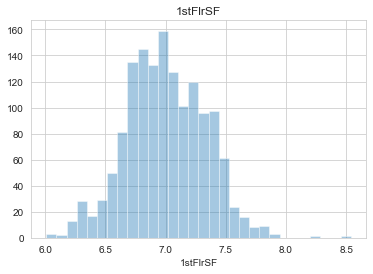

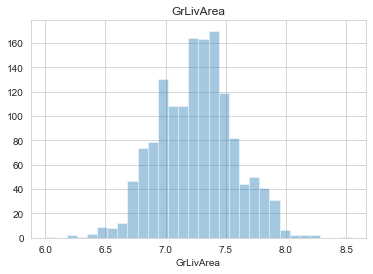

In [12]:
## Taking insights from above graphs
numerical_valued_feature = ["LotFrontage","LotArea","1stFlrSF","GrLivArea"]

for feature in numerical_valued_feature:
    data[feature] = np.log(data[feature])
    sns.distplot(data[feature],bins=30,kde=False)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

* We'll removing categorical variable that are present less than 1 % of the observation

In [13]:
categorical_valued_feature = [feature for feature in data.columns if data[feature].dtype=='O']

In [14]:
for feature in categorical_valued_feature:
    temp = data.groupby(feature)[feature].count()/len(data)
    temp_df = temp[temp>0.01].index
    data[feature] = np.where(dataset[feature].isin(temp_df),data[feature],"Rare_var")

#### Feature Scaling

In [15]:
for feature in categorical_valued_feature:
    labels_ordered = data.groupby(feature)['Id'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    data[feature] = data[feature].map(labels_ordered)

In [16]:
feature_scaling=[feature for feature in data.columns if feature not in ["Id"]]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[feature_scaling])

MinMaxScaler()

In [18]:
scaler.transform(data[feature_scaling])

array([[0.        , 0.25      , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.5       , 0.48035069, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
data = pd.concat([data[["Id"]].reset_index(drop = True),
                     pd.DataFrame(scaler.transform(data[feature_scaling]),columns = feature_scaling)],
                   axis=1)

In [20]:
data.to_csv("cleaned_test.csv",index = False)